1901-01-01 00:00:00
1901-02-01 00:00:00
1901-03-01 00:00:00
1901-04-01 00:00:00
1901-05-01 00:00:00
1901-06-01 00:00:00
1901-07-01 00:00:00
1901-08-01 00:00:00
1901-09-01 00:00:00
1901-10-01 00:00:00
1901-11-01 00:00:00
1901-12-01 00:00:00
1902-01-01 00:00:00
1902-02-01 00:00:00
1902-03-01 00:00:00
1902-04-01 00:00:00
1902-05-01 00:00:00
1902-06-01 00:00:00
1902-07-01 00:00:00
1902-08-01 00:00:00
1902-09-01 00:00:00
1902-10-01 00:00:00
1902-11-01 00:00:00
1902-12-01 00:00:00
1903-01-01 00:00:00
1903-02-01 00:00:00
1903-03-01 00:00:00
1903-04-01 00:00:00
1903-05-01 00:00:00
1903-06-01 00:00:00
1903-07-01 00:00:00
1903-08-01 00:00:00
1903-09-01 00:00:00
1903-10-01 00:00:00
1903-11-01 00:00:00
1903-12-01 00:00:00
predicted=349.117636, expected=342.300000
predicted=306.513010, expected=339.700000
predicted=387.376466, expected=440.400000
predicted=348.154255, expected=315.900000
predicted=386.308811, expected=439.300000
predicted=356.082028, expected=401.300000
predicted=446.379518, expect

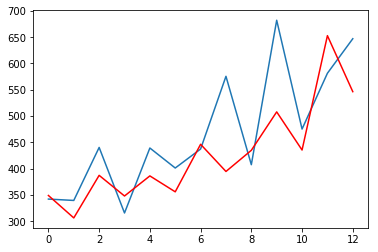

In [7]:

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
    print(datetime.strptime('190'+x, '%Y-%m'))
    return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')


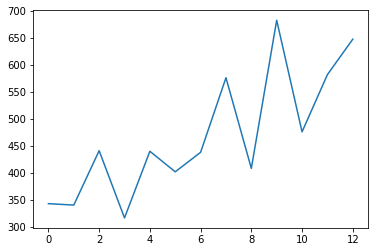

In [2]:
pyplot.plot(test)

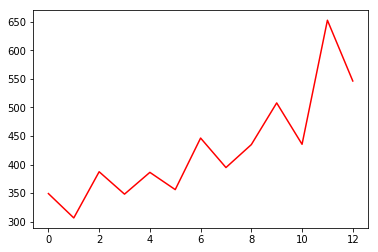

In [3]:
pyplot.plot(predictions, color='red')